In [0]:
# install detectron2:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/index.html

In [0]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

In [0]:
# download, decompress the data
#!wget 'https://drive.google.com/uc?export=download&id=1XRBS9hxK4l1zMQuMNZuefa12r52yKwX2' -O pic.zip
!rm -rf pic
!unzip pic.zip > /dev/null
!rm pic.zip

In [0]:
from detectron2.data.datasets import register_coco_instances
from detectron2.data import DatasetCatalog, MetadataCatalog
#清除旧dataset
DatasetCatalog.clear()
register_coco_instances("my_dataset_train", {}, "pic/train.json", "pic/train")
register_coco_instances("my_dataset_test", {}, "pic/test.json", "pic/test")
register_coco_instances("my_dataset_valid", {}, "pic/valid.json", "pic/valid")

In [0]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_C4_1x.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_train","my_dataset_valid")
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_C4_1x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 600
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[04/22 06:39:59 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): ResNet(
    (stem): BasicStem(
      (conv1): Conv2d(
        3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
        (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
      )
    )
    (res2): Sequential(
      (0): BottleneckBlock(
        (shortcut): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
        )
        (conv1): Conv2d(
          64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv2): Conv2d(
          64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv3): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
 

'roi_heads.box_predictor.cls_score.weight' has shape (81, 2048) in the checkpoint but (5, 2048) in the model! Skipped.
'roi_heads.box_predictor.cls_score.bias' has shape (81,) in the checkpoint but (5,) in the model! Skipped.
'roi_heads.box_predictor.bbox_pred.weight' has shape (320, 2048) in the checkpoint but (16, 2048) in the model! Skipped.
'roi_heads.box_predictor.bbox_pred.bias' has shape (320,) in the checkpoint but (16,) in the model! Skipped.


[04/22 06:40:00 d2.engine.train_loop]: Starting training from iteration 0
[04/22 06:40:09 d2.utils.events]:  eta: 0:04:37  iter: 19  total_loss: 5.011  loss_cls: 1.745  loss_box_reg: 0.793  loss_rpn_cls: 2.143  loss_rpn_loc: 0.330  time: 0.4751  data_time: 0.0165  lr: 0.000005  max_mem: 2930M
[04/22 06:40:19 d2.utils.events]:  eta: 0:04:27  iter: 39  total_loss: 4.330  loss_cls: 1.586  loss_box_reg: 0.823  loss_rpn_cls: 1.685  loss_rpn_loc: 0.332  time: 0.4767  data_time: 0.0072  lr: 0.000010  max_mem: 2930M
[04/22 06:40:29 d2.utils.events]:  eta: 0:04:20  iter: 59  total_loss: 3.263  loss_cls: 1.339  loss_box_reg: 0.821  loss_rpn_cls: 0.766  loss_rpn_loc: 0.299  time: 0.4820  data_time: 0.0061  lr: 0.000015  max_mem: 2930M
[04/22 06:40:39 d2.utils.events]:  eta: 0:04:12  iter: 79  total_loss: 2.523  loss_cls: 1.123  loss_box_reg: 0.879  loss_rpn_cls: 0.266  loss_rpn_loc: 0.260  time: 0.4849  data_time: 0.0087  lr: 0.000020  max_mem: 2930M
[04/22 06:40:48 d2.utils.events]:  eta: 0:04:0

In [0]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.8   # set the testing threshold for this model
cfg.DATASETS.TEST = ('my_dataset_test')
predictor = DefaultPredictor(cfg)

In [0]:
train_metadata = MetadataCatalog.get("my_dataset_train")

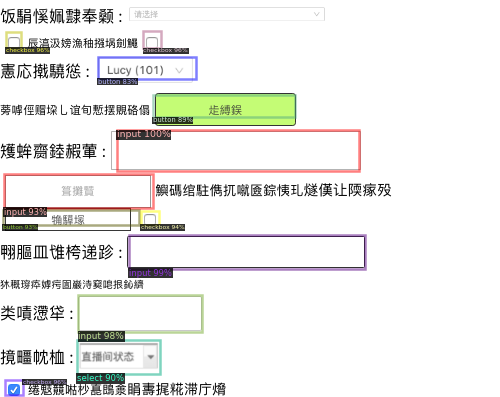

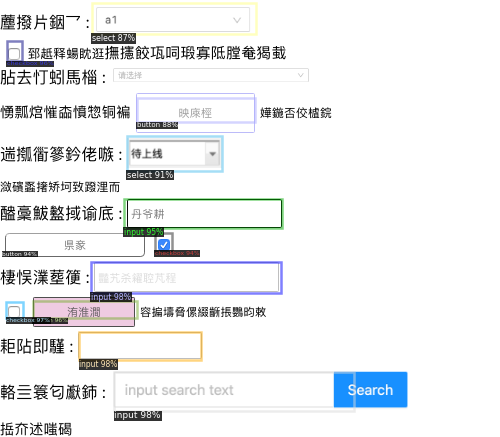

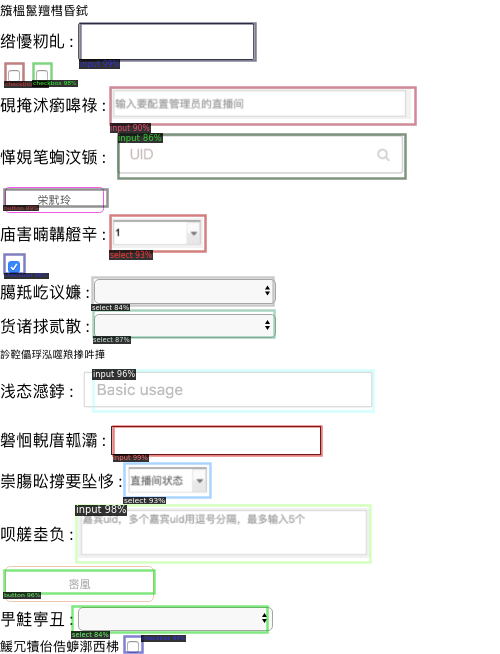

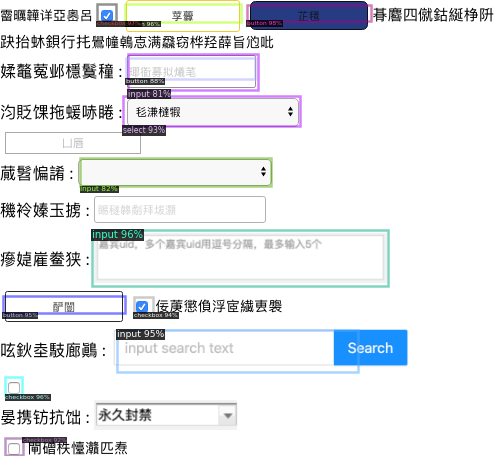

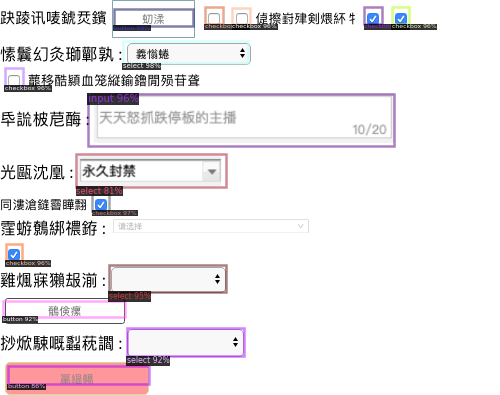

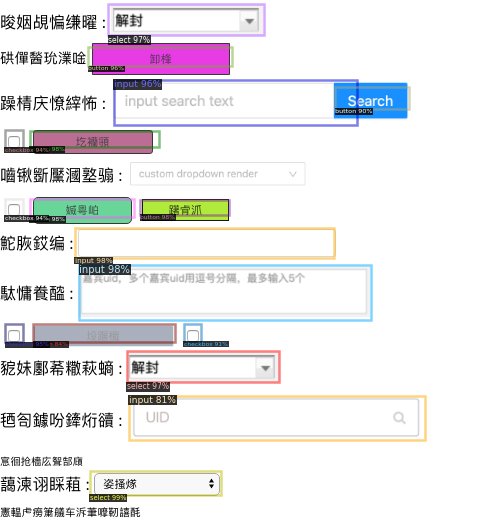

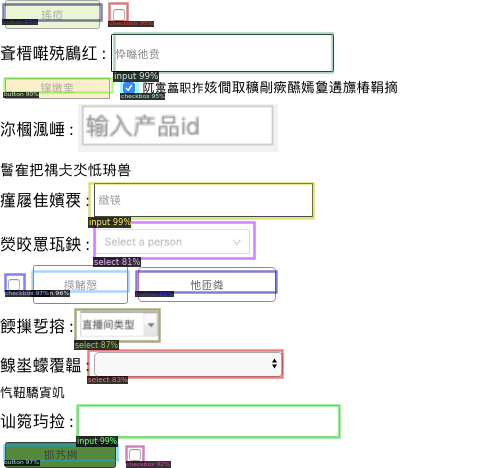

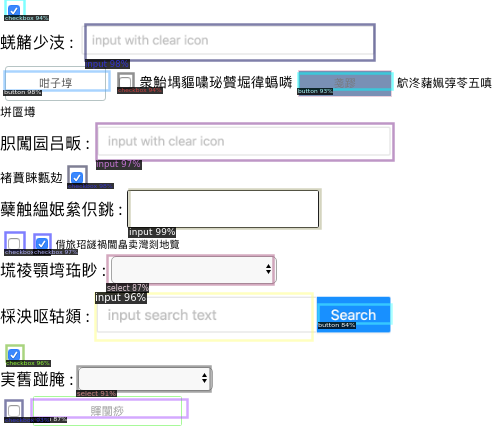

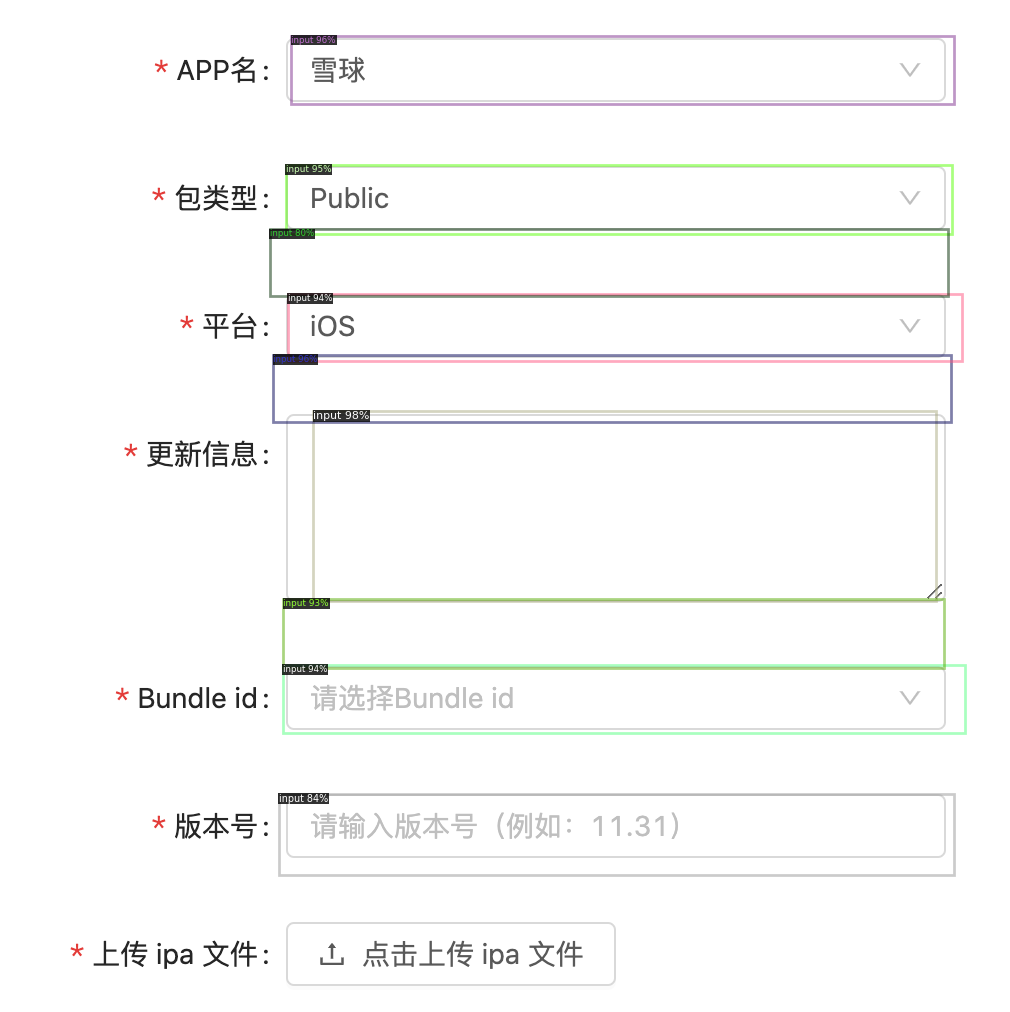

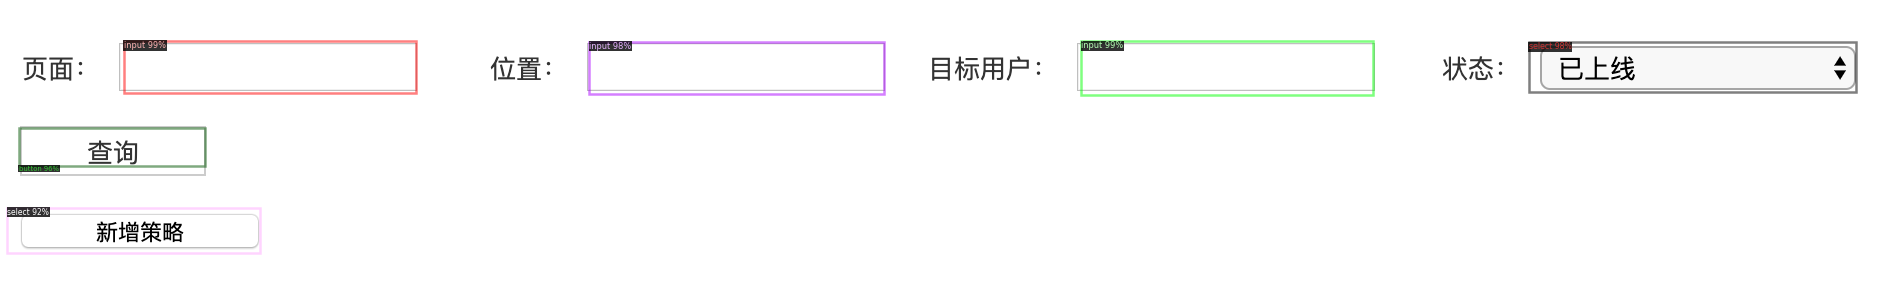

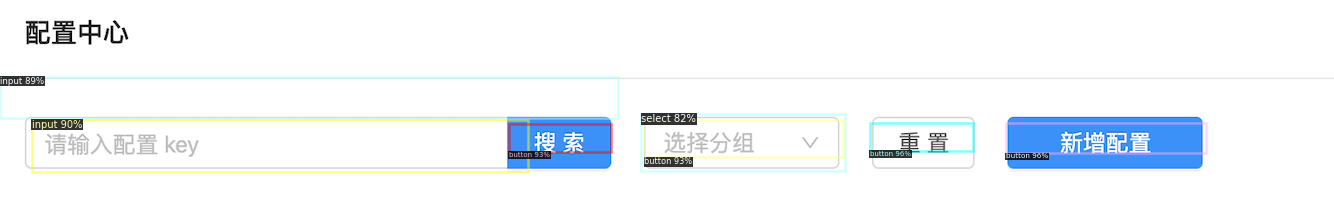

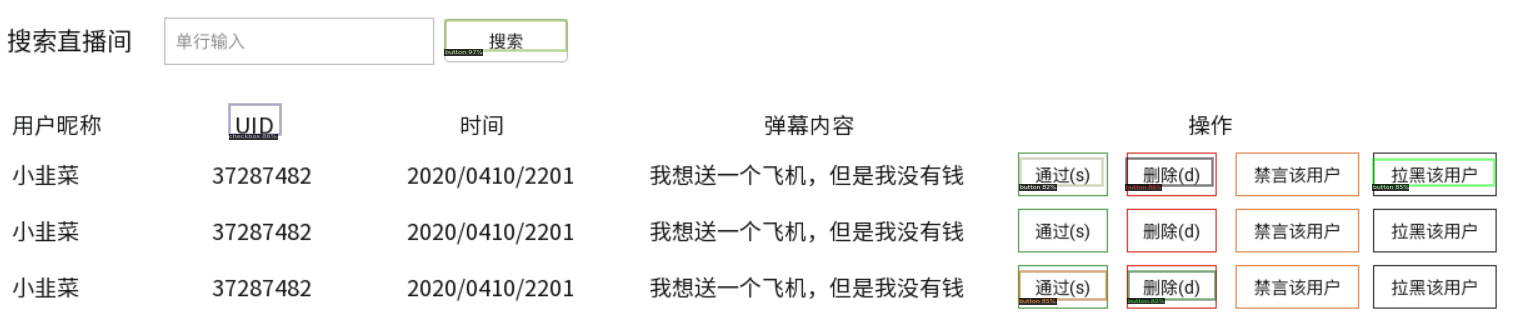

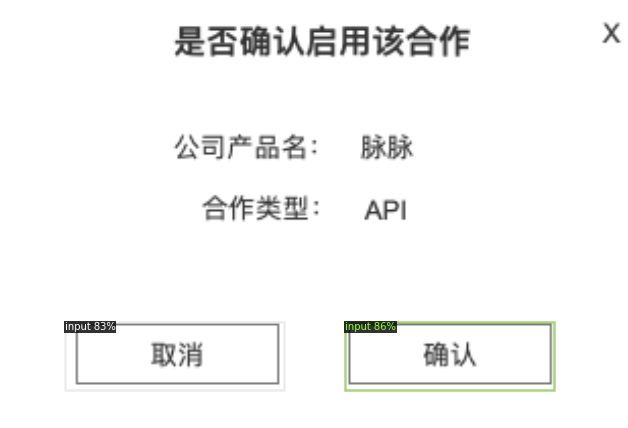

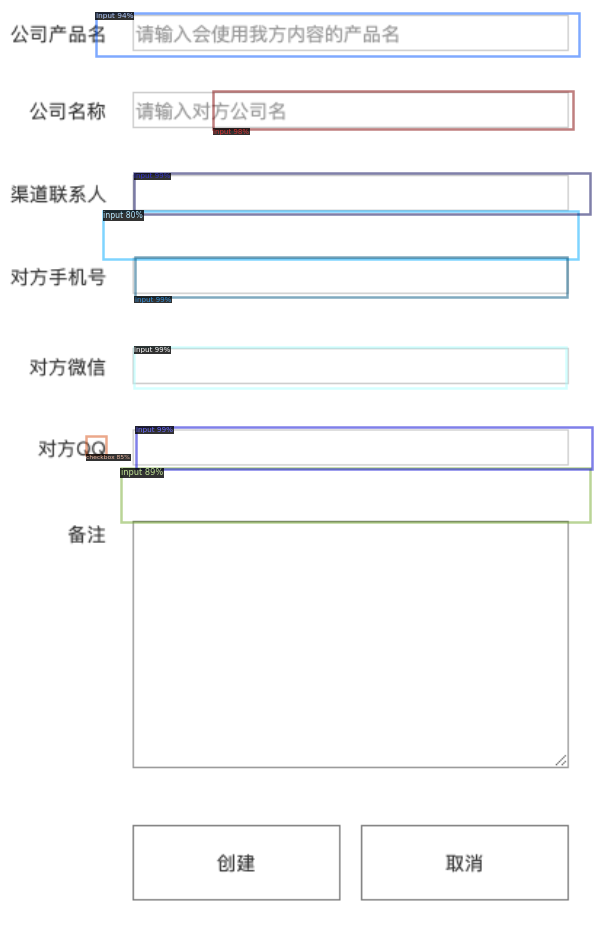

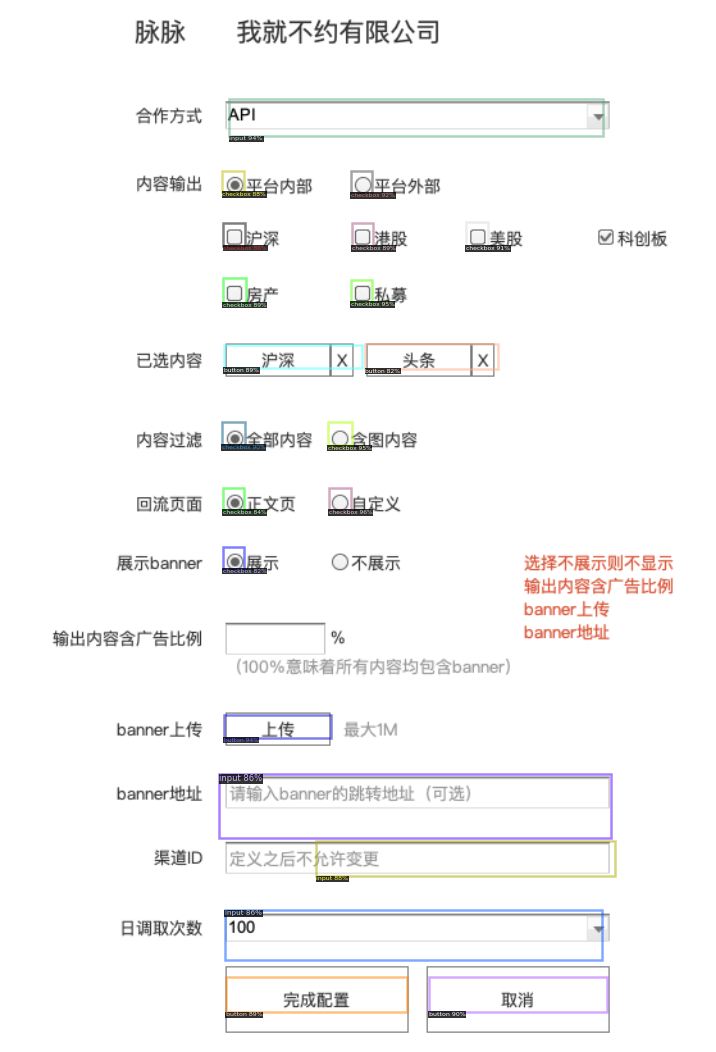

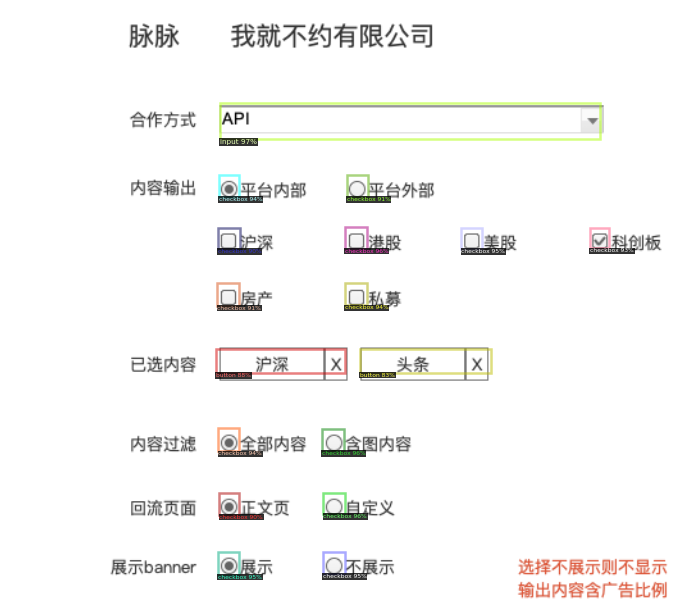

In [0]:
from detectron2.utils.visualizer import ColorMode 
for img in range(8):
  im = cv2.imread("/content/pic/test/"+ str(img + 1) +".png")
  outputs = predictor(im)
  # print(outputs)
  v = Visualizer(im[:, :, ::-1],
                  metadata=train_metadata, 
                  scale=1, 
                  instance_mode=ColorMode.SEGMENTATION
  )
  v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  cv2_imshow(v.get_image()[:, :, ::-1])


for img in range(8):
  im = cv2.imread("/content/pic/crm/"+ str(img + 1) +".png")
  outputs = predictor(im)
  # print(outputs)
  v = Visualizer(im[:, :, ::-1],
                  metadata=train_metadata, 
                  scale=1, 
                  instance_mode=ColorMode.SEGMENTATION
  )
  v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  cv2_imshow(v.get_image()[:, :, ::-1])

In [0]:
#!cp /content/output/model_final.pth /content/drive/My\ Drive/model/detect/1.pth

In [0]:
#!rm -rf pic

In [0]:
# from detectron2.evaluation import COCOEvaluator, inference_on_dataset
# from detectron2.data import build_detection_test_loader
# evaluator = COCOEvaluator("my_dataset_test", cfg, False, output_dir="./output/")
# val_loader = build_detection_test_loader(cfg, "my_dataset_valid")
# inference_on_dataset(trainer.model, val_loader, evaluator)
# another equivalent way is to use trainer.test